In [40]:
def to_rigetti_idx(index):
    ring_size = 8
    columns = 5
    row = index // (ring_size * columns)
    column = (index % (ring_size * columns)) // ring_size
    ring = (index % (ring_size * columns)) % ring_size
    return row * 100 + column * 10 + ring

print(to_rigetti_idx(0))
print(to_rigetti_idx(43))

0
103


(1, 40) 1


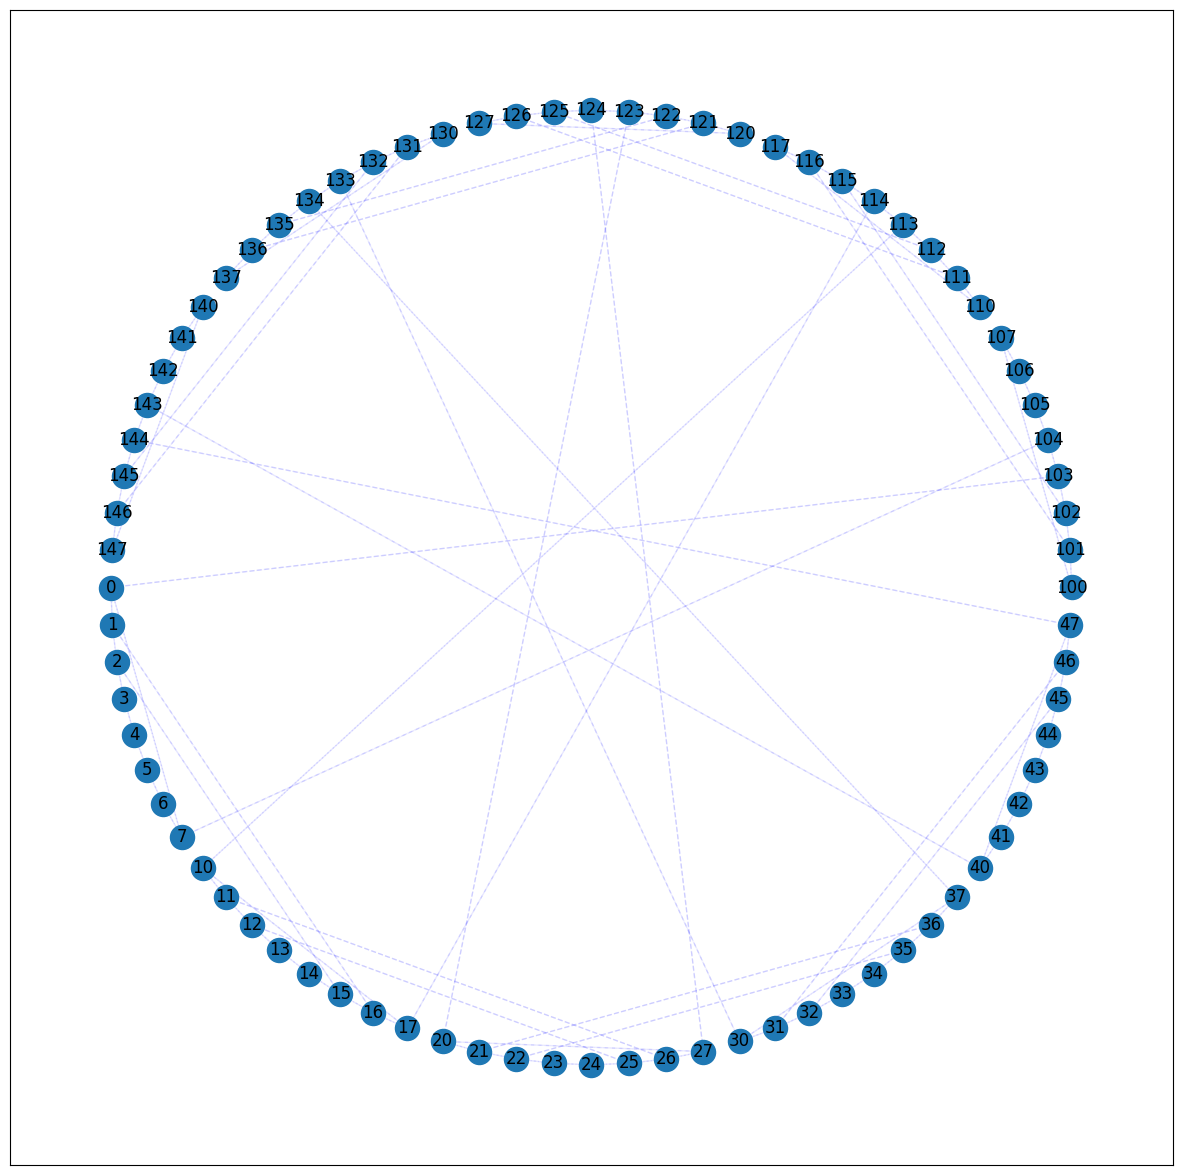

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


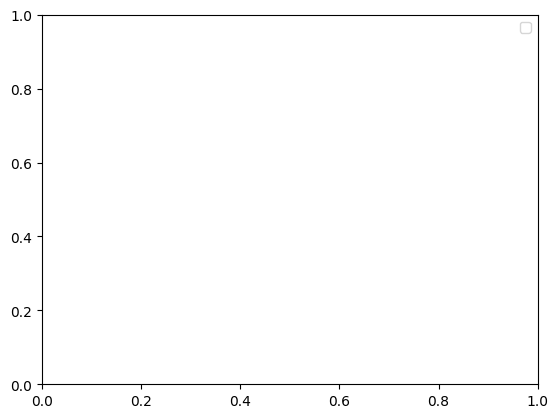

In [54]:
import networkx as nx
import matplotlib.pyplot as plt
from mqt.bench.devices import RigettiProvider
idx = {}
for i in range(8):
    for j in range(80):
        # List of old edges
        edges = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [0, 7], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [8, 15], [2, 13], [1, 14], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [16, 23], [10, 21], [9, 22], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [30, 31], [24, 31], [18, 29], [17, 30], [32, 33], [33, 34], [34, 35], [35, 36], [36, 37], [37, 38], [38, 39], [32, 39], [26, 37], [25, 38], [40, 41], [41, 42], [42, 43], [43, 44], [44, 45], [45, 46], [46, 47], [40, 47], [48, 49], [49, 50], [50, 51], [51, 52], [52, 53], [53, 54], [54, 55], [48, 55], [42, 53], [41, 54], [56, 57], [57, 58], [58, 59], [59, 60], [60, 61], [61, 62], [62, 63], [56, 63], [50, 61], [49, 62], [64, 65], [65, 66], [66, 67], [67, 68], [68, 69], [69, 70], [70, 71], [64, 71], [58, 69], [57, 70], [72, 73], [73, 74], [74, 75], [75, 76], [76, 77], [77, 78], [78, 79], [72, 79], [66, 77], [65, 78], [3, 40], [4, 47], [11, 48], [12, 55], [19, 56], [20, 63], [27, 64], [28, 71], [35, 72], [36, 79], [1, 0], [2, 1], [3, 2], [4, 3], [5, 4], [6, 5], [7, 6], [7, 0], [9, 8], [10, 9], [11, 10], [12, 11], [13, 12], [14, 13], [15, 14], [15, 8], [13, 2], [14, 1], [17, 16], [18, 17], [19, 18], [20, 19], [21, 20], [22, 21], [23, 22], [23, 16], [21, 10], [22, 9], [25, 24], [26, 25], [27, 26], [28, 27], [29, 28], [30, 29], [31, 30], [31, 24], [29, 18], [30, 17], [33, 32], [34, 33], [35, 34], [36, 35], [37, 36], [38, 37], [39, 38], [39, 32], [37, 26], [38, 25], [41, 40], [42, 41], [43, 42], [44, 43], [45, 44], [46, 45], [47, 46], [47, 40], [49, 48], [50, 49], [51, 50], [52, 51], [53, 52], [54, 53], [55, 54], [55, 48], [53, 42], [54, 41], [57, 56], [58, 57], [59, 58], [60, 59], [61, 60], [62, 61], [63, 62], [63, 56], [61, 50], [62, 49], [65, 64], [66, 65], [67, 66], [68, 67], [69, 68], [70, 69], [71, 70], [71, 64], [69, 58], [70, 57], [73, 72], [74, 73], [75, 74], [76, 75], [77, 76], [78, 77], [79, 78], [79, 72], [77, 66], [78, 65], [40, 3], [47, 4], [48, 11], [55, 12], [56, 19], [63, 20], [64, 27], [71, 28], [72, 35], [79, 36]]
        # new device class
        edges2 = [[0, 1], [0, 7], [1, 0], [1, 2], [1, 14], [7, 6], [7, 0], [7, 44], [40, 41], [40, 47], [41, 40], [41, 42], [41, 54], [47, 46], [47, 40], [8, 9], [8, 15], [8, 51], [9, 8], [9, 10], [9, 22], [15, 14], [15, 8], [15, 52], [51, 50], [51, 52], [51, 8], [48, 49], [48, 55], [49, 48], [49, 50], [49, 62], [55, 54], [55, 48], [16, 17], [16, 23], [16, 59], [17, 16], [17, 18], [17, 30], [23, 22], [23, 16], [23, 60], [59, 58], [59, 60], [59, 16], [56, 57], [56, 63], [57, 56], [57, 58], [57, 70], [63, 62], [63, 56], [24, 25], [24, 31], [24, 67], [25, 24], [25, 26], [25, 38], [31, 30], [31, 24], [31, 68], [67, 66], [67, 68], [67, 24], [64, 65], [64, 71], [65, 64], [65, 66], [65, 78], [71, 70], [71, 64], [32, 33], [32, 39], [32, 75], [33, 32], [33, 34], [39, 38], [39, 32], [39, 76], [75, 74], [75, 76], [75, 32], [72, 73], [72, 79], [73, 72], [73, 74], [79, 78], [79, 72], [2, 1], [2, 3], [2, 13], [14, 13], [14, 15], [14, 1], [42, 41], [42, 43], [42, 53], [54, 53], [54, 55], [54, 41], [10, 9], [10, 11], [10, 21], [22, 21], [22, 23], [22, 9], [50, 49], [50, 51], [50, 61], [62, 61], [62, 63], [62, 49], [18, 17], [18, 19], [18, 29], [30, 29], [30, 31], [30, 17], [58, 57], [58, 59], [58, 69], [70, 69], [70, 71], [70, 57], [26, 25], [26, 27], [26, 37], [38, 37], [38, 39], [38, 25], [66, 65], [66, 67], [66, 77], [78, 77], [78, 79], [78, 65], [34, 33], [34, 35], [74, 73], [74, 75], [3, 2], [3, 4], [13, 12], [13, 14], [13, 2], [43, 42], [43, 44], [53, 52], [53, 54], [53, 42], [11, 10], [11, 12], [21, 20], [21, 22], [21, 10], [61, 60], [61, 62], [61, 50], [19, 18], [19, 20], [29, 28], [29, 30], [29, 18], [69, 68], [69, 70], [69, 58], [27, 26], [27, 28], [37, 36], [37, 38], [37, 26], [77, 76], [77, 78], [77, 66], [35, 34], [35, 36], [4, 3], [4, 5], [44, 43], [44, 45], [44, 7], [12, 11], [12, 13], [52, 51], [52, 53], [52, 15], [20, 19], [20, 21], [60, 59], [60, 61], [60, 23], [28, 27], [28, 29], [68, 67], [68, 69], [68, 31], [36, 35], [36, 37], [76, 75], [76, 77], [76, 39], [5, 4], [5, 6], [45, 44], [45, 46], [6, 5], [6, 7], [46, 45], [46, 47]]
        
        # translate edges
        edges = [[(u[0]+i*j)%80, (u[1]+i*j)%80] for u in edges]

        # Convert edge lists to sets
        edges_set = set(map(frozenset, edges))  # Use frozenset to handle undirected edges
        edges2_set = set(map(frozenset, edges2))

        # Find edges that are unique to each list
        unique_edges = edges_set - edges2_set
        unique_edges2 = edges2_set - edges_set

        idx[(i,j)] = len(unique_edges) + len(unique_edges2)

# print minimum sum of length of unique edges
print(min(idx, key=idx.get), idx[min(idx, key=idx.get)])



edges = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [0, 7], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [8, 15], [2, 13], [1, 14], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [16, 23], [10, 21], [9, 22], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [30, 31], [24, 31], [18, 29], [17, 30], [32, 33], [33, 34], [34, 35], [35, 36], [36, 37], [37, 38], [38, 39], [32, 39], [26, 37], [25, 38], [40, 41], [41, 42], [42, 43], [43, 44], [44, 45], [45, 46], [46, 47], [40, 47], [48, 49], [49, 50], [50, 51], [51, 52], [52, 53], [53, 54], [54, 55], [48, 55], [42, 53], [41, 54], [56, 57], [57, 58], [58, 59], [59, 60], [60, 61], [61, 62], [62, 63], [56, 63], [50, 61], [49, 62], [64, 65], [65, 66], [66, 67], [67, 68], [68, 69], [69, 70], [70, 71], [64, 71], [58, 69], [57, 70], [72, 73], [73, 74], [74, 75], [75, 76], [76, 77], [77, 78], [78, 79], [72, 79], [66, 77], [65, 78], [3, 40], [4, 47], [11, 48], [12, 55], [19, 56], [20, 63], [27, 64], [28, 71], [35, 72], [36, 79], [1, 0], [2, 1], [3, 2], [4, 3], [5, 4], [6, 5], [7, 6], [7, 0], [9, 8], [10, 9], [11, 10], [12, 11], [13, 12], [14, 13], [15, 14], [15, 8], [13, 2], [14, 1], [17, 16], [18, 17], [19, 18], [20, 19], [21, 20], [22, 21], [23, 22], [23, 16], [21, 10], [22, 9], [25, 24], [26, 25], [27, 26], [28, 27], [29, 28], [30, 29], [31, 30], [31, 24], [29, 18], [30, 17], [33, 32], [34, 33], [35, 34], [36, 35], [37, 36], [38, 37], [39, 38], [39, 32], [37, 26], [38, 25], [41, 40], [42, 41], [43, 42], [44, 43], [45, 44], [46, 45], [47, 46], [47, 40], [49, 48], [50, 49], [51, 50], [52, 51], [53, 52], [54, 53], [55, 54], [55, 48], [53, 42], [54, 41], [57, 56], [58, 57], [59, 58], [60, 59], [61, 60], [62, 61], [63, 62], [63, 56], [61, 50], [62, 49], [65, 64], [66, 65], [67, 66], [68, 67], [69, 68], [70, 69], [71, 70], [71, 64], [69, 58], [70, 57], [73, 72], [74, 73], [75, 74], [76, 75], [77, 76], [78, 77], [79, 78], [79, 72], [77, 66], [78, 65], [40, 3], [47, 4], [48, 11], [55, 12], [56, 19], [63, 20], [64, 27], [71, 28], [72, 35], [79, 36]]

# new device class
device = RigettiProvider.get_device("rigetti_aspen_m2")
edges2 = device.coupling_map

# translate edges
edges = [[(u[0]+40)%80, (u[1]+40)%80] for u in edges]

# Convert edge lists to sets
edges_set = set(map(frozenset, edges))  # Use frozenset to handle undirected edges
edges2_set = set(map(frozenset, edges2))

# Find edges that are unique to each list
unique_edges = edges_set - edges2_set
unique_edges2 = edges2_set - edges_set

# Convert back to list of tuples
unique_edges = list(map(list, unique_edges))
unique_edges2 = list(map(list, unique_edges2))

# back to rigetti
edges = [[to_rigetti_idx(u[0]), to_rigetti_idx(u[1])] for u in edges]
edges2 = [[to_rigetti_idx(u[0]), to_rigetti_idx(u[1])] for u in edges2]
unique_edges = [[to_rigetti_idx(u[0]), to_rigetti_idx(u[1])] for u in unique_edges]
unique_edges2 = [[to_rigetti_idx(u[0]), to_rigetti_idx(u[1])] for u in unique_edges2]

# Create a graph from the edges
G = nx.Graph(edges + edges2 + unique_edges + unique_edges2)

# Create a new figure with a specified size
plt.figure(figsize=(15, 15))  # Adjust the size as needed

# Create a layout for the graph with increased scale
layout = nx.circular_layout(G, scale=3)  # Increase the scale value as needed

# Draw the first set of edges
#nx.draw_networkx_edges(G, pos=layout, edgelist=edges, edge_color='blue', style='dashed', alpha=0.1, label='coincide')

# Draw the second set of edges
nx.draw_networkx_edges(G, pos=layout, edgelist=edges2, edge_color='blue', style='dashed', alpha=0.1, label='coincide')

# Draw the second set of edges
nx.draw_networkx_edges(G, pos=layout, edgelist=unique_edges, edge_color='red', style='dashed', alpha=0.5, label='old')

# Draw the second set of edges
nx.draw_networkx_edges(G, pos=layout, edgelist=unique_edges2, edge_color='green', alpha=0.25, label='new')

# Draw the nodes
nx.draw_networkx_nodes(G, pos=layout)

# Add labels to the nodes
nx.draw_networkx_labels(G, pos=layout)

# Show the plot
plt.show()
plt.legend()

In [24]:
def from_rigetti_idx(rigetti_index):
    ring_size = 8
    columns = 5
    row = rigetti_index // 100
    column = (rigetti_index % 100) // 10
    ring = rigetti_index % 10
    return row * (ring_size * columns) + column * ring_size + ring

print(from_rigetti_idx(138))
print(from_rigetti_idx(116))

72
54


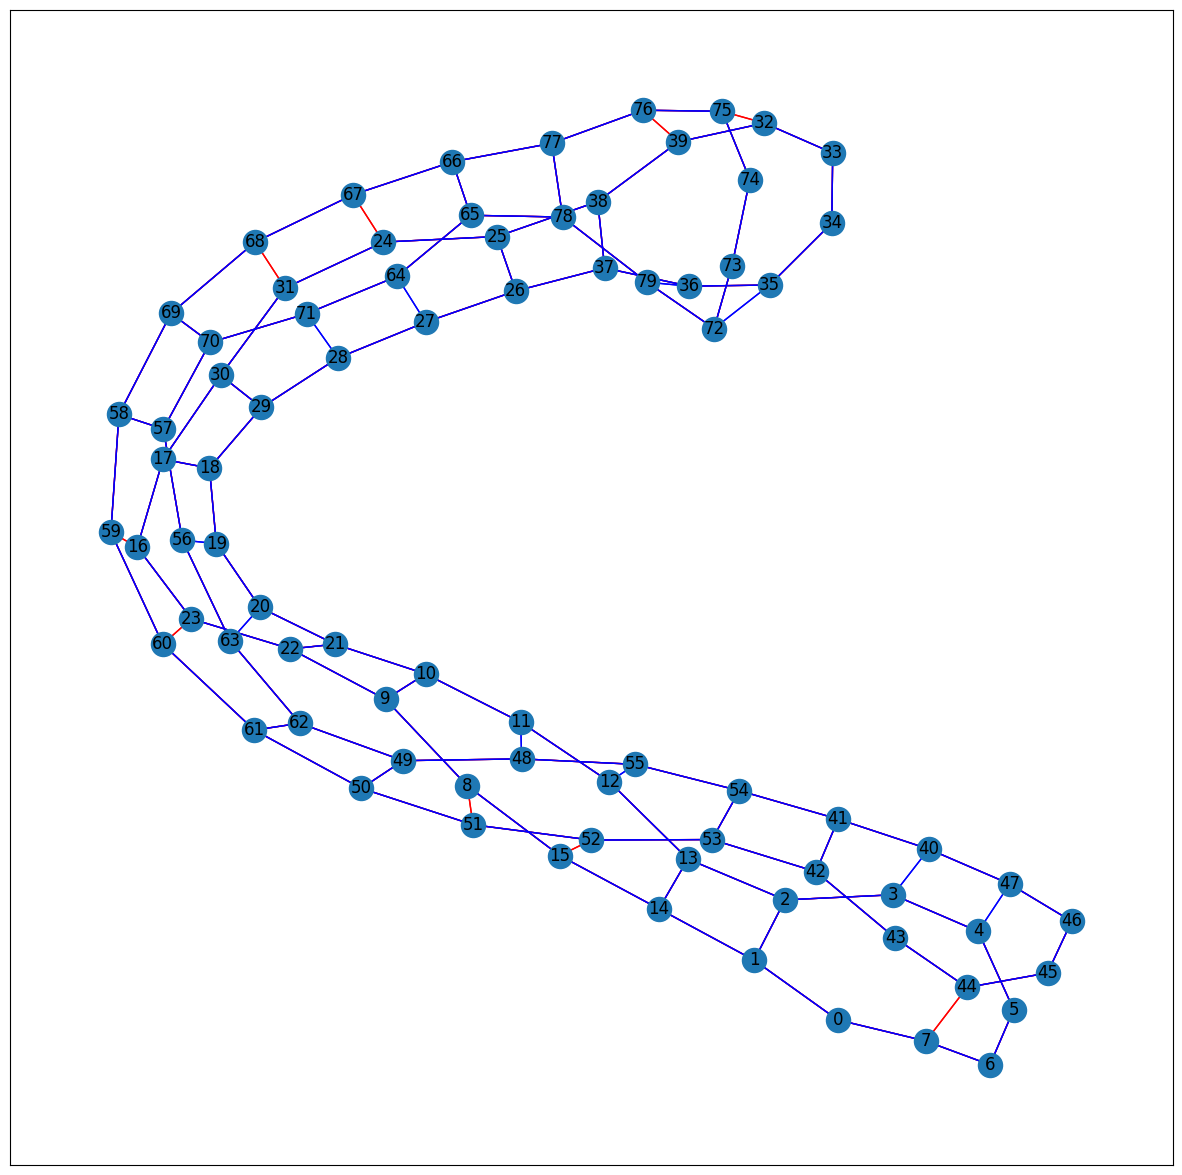

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# List of edges
edges2 = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [0, 7], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [8, 15], [2, 13], [1, 14], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [16, 23], [10, 21], [9, 22], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [30, 31], [24, 31], [18, 29], [17, 30], [32, 33], [33, 34], [34, 35], [35, 36], [36, 37], [37, 38], [38, 39], [32, 39], [26, 37], [25, 38], [40, 41], [41, 42], [42, 43], [43, 44], [44, 45], [45, 46], [46, 47], [40, 47], [48, 49], [49, 50], [50, 51], [51, 52], [52, 53], [53, 54], [54, 55], [48, 55], [42, 53], [41, 54], [56, 57], [57, 58], [58, 59], [59, 60], [60, 61], [61, 62], [62, 63], [56, 63], [50, 61], [49, 62], [64, 65], [65, 66], [66, 67], [67, 68], [68, 69], [69, 70], [70, 71], [64, 71], [58, 69], [57, 70], [72, 73], [73, 74], [74, 75], [75, 76], [76, 77], [77, 78], [78, 79], [72, 79], [66, 77], [65, 78], [3, 40], [4, 47], [11, 48], [12, 55], [19, 56], [20, 63], [27, 64], [28, 71], [35, 72], [36, 79], [1, 0], [2, 1], [3, 2], [4, 3], [5, 4], [6, 5], [7, 6], [7, 0], [9, 8], [10, 9], [11, 10], [12, 11], [13, 12], [14, 13], [15, 14], [15, 8], [13, 2], [14, 1], [17, 16], [18, 17], [19, 18], [20, 19], [21, 20], [22, 21], [23, 22], [23, 16], [21, 10], [22, 9], [25, 24], [26, 25], [27, 26], [28, 27], [29, 28], [30, 29], [31, 30], [31, 24], [29, 18], [30, 17], [33, 32], [34, 33], [35, 34], [36, 35], [37, 36], [38, 37], [39, 38], [39, 32], [37, 26], [38, 25], [41, 40], [42, 41], [43, 42], [44, 43], [45, 44], [46, 45], [47, 46], [47, 40], [49, 48], [50, 49], [51, 50], [52, 51], [53, 52], [54, 53], [55, 54], [55, 48], [53, 42], [54, 41], [57, 56], [58, 57], [59, 58], [60, 59], [61, 60], [62, 61], [63, 62], [63, 56], [61, 50], [62, 49], [65, 64], [66, 65], [67, 66], [68, 67], [69, 68], [70, 69], [71, 70], [71, 64], [69, 58], [70, 57], [73, 72], [74, 73], [75, 74], [76, 75], [77, 76], [78, 77], [79, 78], [79, 72], [77, 66], [78, 65], [40, 3], [47, 4], [48, 11], [55, 12], [56, 19], [63, 20], [64, 27], [71, 28], [72, 35], [79, 36]]
edges = [[0, 1], [0, 7], [1, 0], [1, 2], [1, 14], [7, 6], [7, 0], [7, 44], [40, 41], [40, 47], [41, 40], [41, 42], [41, 54], [47, 46], [47, 40], [8, 9], [8, 15], [8, 51], [9, 8], [9, 10], [9, 22], [15, 14], [15, 8], [15, 52], [51, 50], [51, 52], [51, 8], [48, 49], [48, 55], [49, 48], [49, 50], [49, 62], [55, 54], [55, 48], [16, 17], [16, 23], [16, 59], [17, 16], [17, 18], [17, 30], [23, 22], [23, 16], [23, 60], [59, 58], [59, 60], [59, 16], [56, 57], [56, 63], [57, 56], [57, 58], [57, 70], [63, 62], [63, 56], [24, 25], [24, 31], [24, 67], [25, 24], [25, 26], [25, 38], [31, 30], [31, 24], [31, 68], [67, 66], [67, 68], [67, 24], [64, 65], [64, 71], [65, 64], [65, 66], [65, 78], [71, 70], [71, 64], [32, 33], [32, 39], [32, 75], [33, 32], [33, 34], [39, 38], [39, 32], [39, 76], [75, 74], [75, 76], [75, 32], [72, 73], [72, 79], [73, 72], [73, 74], [79, 78], [79, 72], [2, 1], [2, 3], [2, 13], [14, 13], [14, 15], [14, 1], [42, 41], [42, 43], [42, 53], [54, 53], [54, 55], [54, 41], [10, 9], [10, 11], [10, 21], [22, 21], [22, 23], [22, 9], [50, 49], [50, 51], [50, 61], [62, 61], [62, 63], [62, 49], [18, 17], [18, 19], [18, 29], [30, 29], [30, 31], [30, 17], [58, 57], [58, 59], [58, 69], [70, 69], [70, 71], [70, 57], [26, 25], [26, 27], [26, 37], [38, 37], [38, 39], [38, 25], [66, 65], [66, 67], [66, 77], [78, 77], [78, 79], [78, 65], [34, 33], [34, 35], [74, 73], [74, 75], [3, 2], [3, 4], [13, 12], [13, 14], [13, 2], [43, 42], [43, 44], [53, 52], [53, 54], [53, 42], [11, 10], [11, 12], [21, 20], [21, 22], [21, 10], [61, 60], [61, 62], [61, 50], [19, 18], [19, 20], [29, 28], [29, 30], [29, 18], [69, 68], [69, 70], [69, 58], [27, 26], [27, 28], [37, 36], [37, 38], [37, 26], [77, 76], [77, 78], [77, 66], [35, 34], [35, 36], [4, 3], [4, 5], [44, 43], [44, 45], [44, 7], [12, 11], [12, 13], [52, 51], [52, 53], [52, 15], [20, 19], [20, 21], [60, 59], [60, 61], [60, 23], [28, 27], [28, 29], [68, 67], [68, 69], [68, 31], [36, 35], [36, 37], [76, 75], [76, 77], [76, 39], [5, 4], [5, 6], [45, 44], [45, 46], [6, 5], [6, 7], [46, 45], [46, 47]]

# Convert edge lists to sets
edges_set = set(map(frozenset, edges))  # Use frozenset to handle undirected edges
edges2_set = set(map(frozenset, edges2))

# Find edges that are unique to each list
unique_edges = edges_set - edges2_set
unique_edges2 = edges2_set - edges_set

# Convert back to list of tuples
#edges = list(map(list, unique_edges))
#edges2 = list(map(list, unique_edges2))

# Create a graph from the edges
G = nx.Graph(edges + edges2)

# Create a new figure with a specified size
plt.figure(figsize=(15, 15))  # Adjust the size as needed

# Draw the first set of edges
nx.draw_networkx_edges(G, pos=layout, edgelist=edges, edge_color='red')

# Draw the second set of edges
nx.draw_networkx_edges(G, pos=layout, edgelist=edges2, edge_color='blue')

# Draw the nodes
nx.draw_networkx_nodes(G, pos=layout)

# Add labels to the nodes
nx.draw_networkx_labels(G, pos=layout)

# Show the plot
plt.show()